# ¿Cuanto valen las Casas en Merlo San Luis?
### Scrapeamos una inmobiliaria random, y analizamos los datos:

In [342]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('list.csv')

In [285]:
#Realizar conteo de los datos... cuantos en pesos en dolares y cuantos "consulte precio?"
#Filtramos los datos de las publicaciones de Merlo
df.head(3)

,Price,Descripcion,ItemAddressList,Zona,Codigo
0,U$D 109.900,"Propiedad a Estrenar en barrio residencial, Me...",Chacho Peñaloza Y Cañada De Los Zainos Nº S/N,"Casa en Venta, Merlo",490
1,U$D 120.000,"Hermosa , brillante, moderna, con luz natural ...",Damas Mendocinas Nº 636,"Casa en Venta, Merlo",731
2,U$D 75.000,Queremos que tu tiempo lo uses en lo mas impor...,Publica Nº S/N,"Casa en Venta, Merlo",784


In [374]:
#Se observan que algunos valores poseen el signo $, correspondería $ pero son con destino alquiler. Luego se las quita del análisis
df["Zona"].unique()

array(['Casa en Venta, Merlo', 'Casa en Venta, Carpintería',
       'Terreno en Venta, Cortaderas', 'Casa en Venta, Santa María',
       'Terreno en Venta, Los Molles', 'Casa en Venta, Los Molles',
       'Campo en Venta, Cruz del Eje',
       'Campo en Venta, Santa Rosa de Conlara',
       'Tipo casa PH en Venta, Merlo', 'Campo en Venta, Concarán',
       'Campo en Venta, Candelaria', 'Casa en Venta, Cortaderas',
       'Terreno en Venta, Merlo', 'Campo en Venta, San Javier/Yacanto',
       'Local en Venta, Merlo', 'Casa en Alquiler temporario, Cortaderas',
       'Casa en Venta, Tilisarao', 'Terreno en Venta, Carpintería',
       'Quinta en Venta, La Paz', 'Campo en Venta, Cortaderas',
       'Hotel en Venta, Merlo', 'Negocio Especial en Venta, Merlo',
       'Hotel en Venta, Carpintería', 'Campo en Venta, Villa del Carmen',
       'Terreno en Venta, Papagayos', 'Departamento en Venta, Merlo',
       'Terreno en Venta, San Javier/Yacanto',
       'Negocio Especial en Venta, Cortadera

In [287]:
df["Zona"].unique()

array(['Casa en Venta, Merlo', 'Casa en Venta, Carpintería',
       'Terreno en Venta, Cortaderas', 'Casa en Venta, Santa María',
       'Terreno en Venta, Los Molles', 'Casa en Venta, Los Molles',
       'Campo en Venta, Cruz del Eje',
       'Campo en Venta, Santa Rosa de Conlara',
       'Tipo casa PH en Venta, Merlo', 'Campo en Venta, Concarán',
       'Campo en Venta, Candelaria', 'Casa en Venta, Cortaderas',
       'Terreno en Venta, Merlo', 'Campo en Venta, San Javier/Yacanto',
       'Local en Venta, Merlo', 'Casa en Alquiler temporario, Cortaderas',
       'Casa en Venta, Tilisarao', 'Terreno en Venta, Carpintería',
       'Quinta en Venta, La Paz', 'Campo en Venta, Cortaderas',
       'Hotel en Venta, Merlo', 'Negocio Especial en Venta, Merlo',
       'Hotel en Venta, Carpintería', 'Campo en Venta, Villa del Carmen',
       'Terreno en Venta, Papagayos', 'Departamento en Venta, Merlo',
       'Terreno en Venta, San Javier/Yacanto',
       'Negocio Especial en Venta, Cortadera

In [375]:
valores = ["U", "$", "D", "Consulte precio"]
for i in valores:
    df["Price"] = df["Price"].apply(lambda x: x.replace(i,""))

In [376]:
len(df)

370

In [377]:
df["Codigo"].nunique()

269

In [378]:
df = df.drop_duplicates()

In [379]:
#Algunos ajustes
df.Price = pd.to_numeric(df["Price"].str.replace(".",""))

<ipython-input-379-6bc97215f4dd>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Price = pd.to_numeric(df["Price"].str.replace(".",""))
/Users/tinpenas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [380]:
#Filtramos las publicaciones por Casas en Venta y por las Zonas que nos interesan
dfCasas = df[df["Zona"].str.contains(pat="Casa en Venta")]
dfCasas = dfCasas.drop(["Codigo"], axis=1)
dfMerlo = dfCasas[dfCasas["Zona"].str.contains(pat="Merlo")]
dfCarpinteria = dfCasas[dfCasas["Zona"].str.contains(pat="Carpintería")]
dfCortaderas = dfCasas[dfCasas["Zona"].str.contains(pat="Cortaderas")]
dfLosMolles = dfCasas[dfCasas["Zona"].str.contains(pat="Los Molles")]


### Cantidad de Casas por Población:

In [384]:
print("Casas en Merlo", len(dfMerlo), "\nCasas en Carpinteria", len(dfCarpinteria), "\nCasas en Cortaderas",len(dfCortaderas), "\nCasas en Los Molles", len(dfLosMolles))

Casas en Merlo 47 
Casas en Carpinteria 2 
Casas en Cortaderas 3 
Casas en Los Molles 7


In [385]:
mean = [dfMerlo["Price"].mean(), dfCarpinteria["Price"].mean(), dfCortaderas["Price"].mean(), dfLosMolles["Price"].mean()]
min = [dfMerlo["Price"].min(), dfCarpinteria["Price"].min(), dfCortaderas["Price"].min(), dfLosMolles["Price"].min()]
max = [dfMerlo["Price"].max(), dfCarpinteria["Price"].max(), dfCortaderas["Price"].max(), dfLosMolles["Price"].max()]

df2 = pd.DataFrame({
        'Mean':mean, 
        'min':min, 
        'max':max,
        })

In [386]:
df2.rename(index={0:'Merlo',1:'Carpinteria',2:'Cortaderas',3:'LosMolles'}, inplace=True)
df2 = round(df2,2)
df2

,Mean,min,max
Merlo,144502.17,32000.0,600000.0
Carpinteria,69500.00,60000.0,79000.0
Cortaderas,200000.00,120000.0,260000.0
LosMolles,131428.57,45000.0,260000.0


Distribución de Cantidad de Publicaciones según el precio

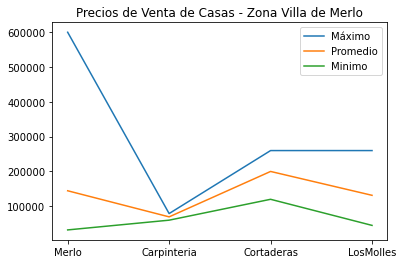

In [387]:
fig, ax = plt.subplots()

ax.plot(df2["max"], label="Máximo")
ax.plot(df2["Mean"], label="Promedio")
ax.plot(df2["min"], label="Minimo")

ax.legend()
plt.title("Precios de Venta de Casas - Zona Villa de Merlo")
plt.show()


### Analizamos la Distribución de Precios de Merlo
Sólo esta población, dado que es la que posee la mayor cantidad de publicaciones

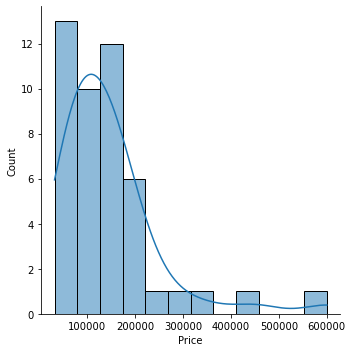

In [390]:
sns.displot(data=dfMerlo, x="Price", kde = True)

<AxesSubplot:xlabel='Price'>

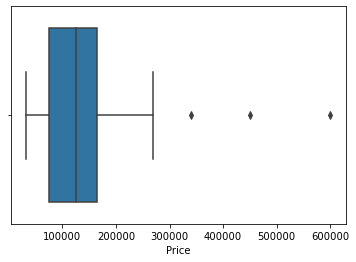

In [391]:
sns.boxplot(data=dfMerlo, x="Price")

El presente análisis se realiza sólo de manera de práctica sobre las librerías Pandas, Matplotlib y Seaborn. (Datos extraídos con Selenium y BeautifulSoup). Uso con fines acádemicos / de práctica